In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import Utils.BuildMatrix as bm
np.core.arrayprint._line_width = 160
import seaborn as sns; sns.set()

In [2]:
from collections import namedtuple
DecompSVD = namedtuple('DecompSVD', 'Orig U Sigma V')
def MakeDecompSVD(matrix):
    U, sigma, V = np.linalg.svd(matrix)
    return DecompSVD(Orig=matrix, U=U, Sigma=sigma, V=V)

In [3]:
def randnMatrixList(rows:int, cols:int, count:int, seed:int=None):
    if seed == None:
        seed = 1234
    return [bm.randnMatrix(rows=rows, cols=cols, seed=seed + i) for i in range(count)]

In [4]:
def randnPdefMatrixList(dim:int, count:int, seed:int=None):
    if seed == None:
        seed = 1234
    return [bm.randnPdefMatrix(rows=dim, cols=dim, seed=seed + i) for i in range(count)]

In [5]:
matrixCount = 100

### SVD Sigmas for random 16x16 matrix

In [6]:
randMatsSq16 = randnMatrixList(rows=16, cols=16, count=matrixCount)

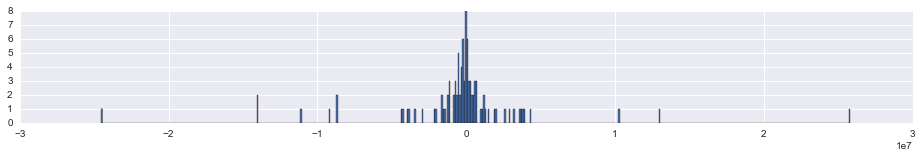

In [7]:
plt.figure(figsize=(16, 2))
plt.hist([LA.det(i) for i in randMatsSq16], 500)
plt.show()

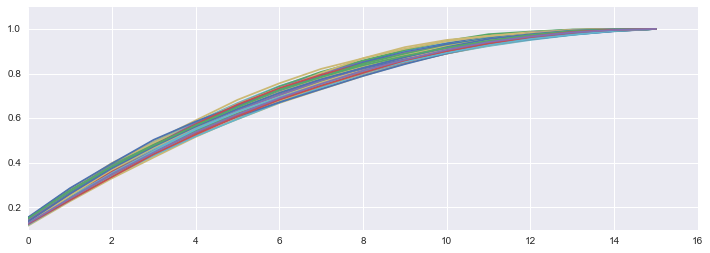

In [8]:
decomps16 = [MakeDecompSVD(m) for m in randMatsSq16]
plt.figure(figsize=(12, 4))
for svd in decomps16:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

### SVD sigmas for random 32x32 matrix

In [9]:
randMatsSq32 = randnMatrixList(rows=32, cols=32, count=matrixCount)
decomps32 = [MakeDecompSVD(m) for m in randMatsSq32]

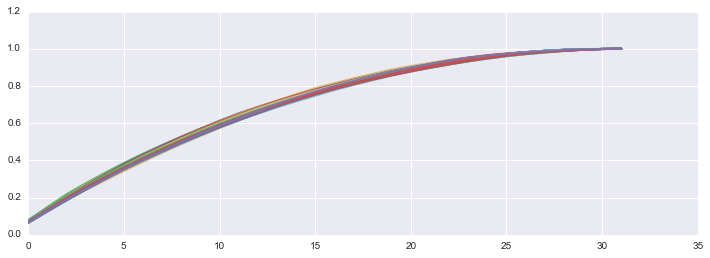

In [10]:
plt.figure(figsize=(12, 4))
for svd in decomps32:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

### Sigmas for some tall matricies

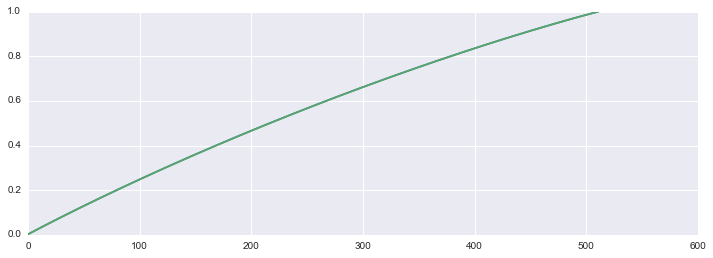

In [11]:
randMatsSq64 = randnMatrixList(rows=4096, cols=512, count=2)
decomps64 = [MakeDecompSVD(m) for m in randMatsSq64]
plt.figure(figsize=(12, 4))
for svd in decomps64:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

In [12]:
randMatsSq32t = randnMatrixList(rows=256, cols=32, count=matrixCount)
decomps32t = [MakeDecompSVD(m) for m in randMatsSq32t]

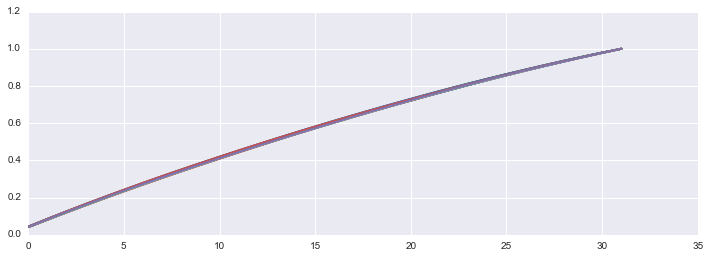

In [13]:
plt.figure(figsize=(12, 4))
for svd in decomps32t:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

### SVD sigmas for random positive definite 32x32 matrix

In [14]:
randMatsPdef32 = randnPdefMatrixList(dim=32, count=matrixCount)
decompsPdef32 = [MakeDecompSVD(m) for m in randMatsPdef32]

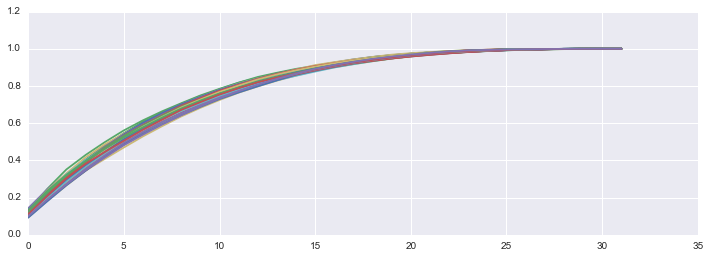

In [15]:
plt.figure(figsize=(12, 4))
for svd in decompsPdef32:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

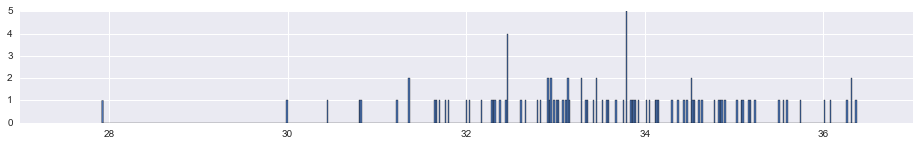

In [20]:
plt.figure(figsize=(16, 2))
detsPdef32 = [LA.det(i) for i in randMatsPdef32]
plt.hist(np.log10(detsPdef32), bins=500)
plt.show()

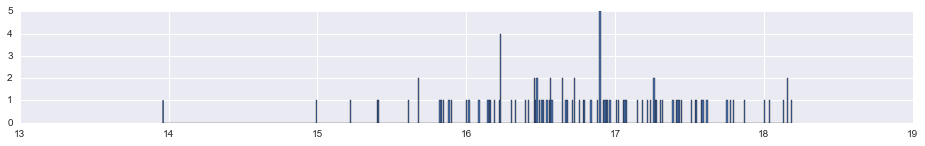

In [29]:
plt.figure(figsize=(16, 2))
detsSq32 = [LA.det(i) for i in randMatsSq32]
plt.hist(np.log10(np.abs(detsSq32)), bins=500)
plt.show()